# KEGG PATHWAY ENRICHMENT

The genelist from EPEK has been enriched for pathways using the enrichr online tool (https://maayanlab.cloud/Enrichr/).

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 10

In [3]:
# Importing the data from ENRICHR
keggenrichr = pd.read_csv('KEGG_2021_Human_ENRICHR.tsv',sep = '\t')

The overlap ratios were calculated from the overlap column, and mentioned in a new column. We also scaled the adjusted p-values as $scaled\_value = -log(AdjustedPvalue) $ to get the relative sizes of nodes for plotting the bubble plot.

In [4]:
# Function to compute the overlap ratio and split the terms from the overlap column.
def compute(row):
    overlap = row['Overlap']
    first_term = float(overlap.split('/')[0])
    second_term = float(overlap.split('/')[1])
    div_term = first_term/second_term
    return first_term, second_term, div_term

In [7]:
# adding the three columns for the calculated terms
keggenrichr[['OverlapEPEK', 'TotalGenes', 'OverlapRatio']] = keggenrichr.apply(lambda x: compute(x), axis = 1, result_type = 'expand')
# added an extra column for scaling the p-values for the node-size
keggenrichr['MaxMinscale']=keggenrichr['AdjustedPvalue'].apply(lambda x: -np.log(x))
# resulting dataframe
print(keggenrichr.shape)
keggenrichr

(249, 13)


,Term,Overlap,Pvalue,AdjustedPvalue,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,OverlapEPEK,TotalGenes,OverlapRatio,MaxMinscale
0,Cytokine-cytokine receptor interaction,29/295,3.624074e-15,9.023943e-13,0,0,7.428835,247.017521,IL1RN;CXCL9;CXCL8;CSH2;CSH1;PRL;CXCL13;TNF;TNF...,29.0,295.0,0.098305,27.733725
1,Rheumatoid arthritis,15/93,1.612785e-11,2.007917e-09,0,0,12.611268,313.395989,CXCL8;FLT1;ANGPT1;IGH;TNF;TNFSF13B;VEGFA;IL6;C...,15.0,93.0,0.161290,20.026168
2,PI3K-Akt signaling pathway,26/354,7.898348e-11,6.555629e-09,0,0,5.328040,123.939714,FLT1;CSH2;CSH1;ITGB3;PRL;EGFR;RXRA;GNG4;PDGFD;...,26.0,354.0,0.073446,18.842942
3,Viral protein interaction with cytokine and cy...,13/100,5.747331e-09,3.577713e-07,0,0,9.729522,184.613116,CXCL9;CXCL8;CXCL13;TNF;CXCL10;IL6;CXCL12;CXCR1...,13.0,100.0,0.130000,14.843372
4,Hematopoietic cell lineage,12/99,4.964816e-08,2.472478e-06,0,0,8.951359,150.546677,IL6;IL1R1;IL1R2;ITGB3;IL1B;HLA-DRA;IGH;IL7R;TN...,12.0,99.0,0.121212,12.910290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Spinocerebellar ataxia,1/143,8.967945e-01,9.114360e-01,0,0,0.439725,0.047899,GRIA3,1.0,143.0,0.006993,0.092734
245,mTOR signaling pathway,1/154,9.133959e-01,9.245348e-01,0,0,0.407881,0.036948,TNF,1.0,154.0,0.006494,0.078465
246,Thermogenesis,1/232,9.750967e-01,9.829922e-01,0,0,0.269076,0.006786,CNR1,1.0,232.0,0.004310,0.017154
247,Parkinson disease,1/249,9.810326e-01,9.849884e-01,0,0,0.250412,0.004795,PARK7,1.0,249.0,0.004016,0.015125


Considered a p-value cut-off < 0.01 and pathway gene set > 50, and got 51 pathways.

In [9]:
#p-value < 0.01 and pathway gene set > 50
keggenrichr0_01 = keggenrichr[keggenrichr.AdjustedPvalue < 0.01]
keggenrichr0_01_50 = keggenrichr0_01[keggenrichr0_01.TotalGenes > 50]
print(keggenrichr0_01_50.shape)
keggenrichr0_01_50

(51, 13)


,Term,Overlap,Pvalue,AdjustedPvalue,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,OverlapEPEK,TotalGenes,OverlapRatio,MaxMinscale
0,Cytokine-cytokine receptor interaction,29/295,3.624074e-15,9.023943e-13,0,0,7.428835,247.017521,IL1RN;CXCL9;CXCL8;CSH2;CSH1;PRL;CXCL13;TNF;TNF...,29.0,295.0,0.098305,27.733725
1,Rheumatoid arthritis,15/93,1.612785e-11,2.007917e-09,0,0,12.611268,313.395989,CXCL8;FLT1;ANGPT1;IGH;TNF;TNFSF13B;VEGFA;IL6;C...,15.0,93.0,0.161290,20.026168
2,PI3K-Akt signaling pathway,26/354,7.898348e-11,6.555629e-09,0,0,5.328040,123.939714,FLT1;CSH2;CSH1;ITGB3;PRL;EGFR;RXRA;GNG4;PDGFD;...,26.0,354.0,0.073446,18.842942
3,Viral protein interaction with cytokine and cy...,13/100,5.747331e-09,3.577713e-07,0,0,9.729522,184.613116,CXCL9;CXCL8;CXCL13;TNF;CXCL10;IL6;CXCL12;CXCR1...,13.0,100.0,0.130000,14.843372
4,Hematopoietic cell lineage,12/99,4.964816e-08,2.472478e-06,0,0,8.951359,150.546677,IL6;IL1R1;IL1R2;ITGB3;IL1B;HLA-DRA;IGH;IL7R;TN...,12.0,99.0,0.121212,12.910290
6,Influenza A,15/172,9.433058e-08,3.355473e-06,0,0,6.240228,100.944793,TPSB2;CXCL8;RSAD2;PLG;TNF;RAB11B;CXCL10;IL6;IL...,15.0,172.0,0.087209,12.604918
7,Th17 cell differentiation,12/107,1.190438e-07,3.705239e-06,0,0,8.194214,130.646697,RXRB;IL6;RXRA;IL1R1;IL1B;STAT3;HLA-DRA;IL6ST;I...,12.0,107.0,0.112150,12.505763
8,HIF-1 signaling pathway,12/109,1.463424e-07,4.048808e-06,0,0,8.024442,126.283181,IL6;FLT1;ANGPT2;ANGPT1;NOS2;STAT3;BCL2;VHL;IL6...,12.0,109.0,0.110092,12.417088
9,Tuberculosis,15/180,1.715337e-07,4.271190e-06,0,0,5.935239,92.462032,NOS2;VDR;BAD;SPHK1;IGH;TNF;CYP27B1;IL6;IL1B;BC...,15.0,180.0,0.083333,12.363618
10,Fluid shear stress and atherosclerosis,13/139,3.044250e-07,6.538166e-06,0,0,6.704635,100.601988,IL1R1;IL1R2;ITGB3;MGST1;TNF;ACVR2B;ACVR2A;VEGF...,13.0,139.0,0.093525,11.937854


Manually mapped the pathways to their corresponding KEGG IDs, KEGG Pathway Main Class and KEGG Pathway Sub Class from the KEGG database

In [11]:
keggidclass = pd.read_csv('KEGG_2021_Human_KEGGID&Class.tsv',sep='\t')
print(keggidclass.shape)
keggidclass

(59, 4)


,Term,KEGGID,KEGGPathwayMainClass,KEGGPathwaySubClass
0,Signaling pathways regulating pluripotency of ...,hsa04550,Cellular Processes,Cellular community - eukaryotes
1,Focal adhesion,hsa04510,Cellular Processes,Cellular community - eukaryotes
2,VEGF signaling pathway,hsa04370,Environmental Information Processing,Signal transduction
3,TGF-beta signaling pathway,hsa04350,Environmental Information Processing,Signal transduction
4,NF-kappa B signaling pathway,hsa04064,Environmental Information Processing,Signal transduction
5,Ras signaling pathway,hsa04014,Environmental Information Processing,Signal transduction
6,HIF-1 signaling pathway,hsa04066,Environmental Information Processing,Signal transduction
7,JAK-STAT signaling pathway,hsa04630,Environmental Information Processing,Signal transduction
8,MAPK signaling pathway,hsa04010,Environmental Information Processing,Signal transduction
9,Rap1 signaling pathway,hsa04015,Environmental Information Processing,Signal transduction


Merged the two dataframes:

In [13]:
keggenrichmerged = keggenrichr0_01_50.merge(keggidclass,how='left',on='Term')
print(keggenrichmerged.shape)
keggenrichmerged

(51, 16)


,Term,Overlap,Pvalue,AdjustedPvalue,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,OverlapEPEK,TotalGenes,OverlapRatio,MaxMinscale,KEGGID,KEGGPathwayMainClass,KEGGPathwaySubClass
0,Cytokine-cytokine receptor interaction,29/295,3.624074e-15,9.023943e-13,0,0,7.428835,247.017521,IL1RN;CXCL9;CXCL8;CSH2;CSH1;PRL;CXCL13;TNF;TNF...,29.0,295.0,0.098305,27.733725,hsa04060,Environmental Information Processing,Signaling molecules and interaction
1,Rheumatoid arthritis,15/93,1.612785e-11,2.007917e-09,0,0,12.611268,313.395989,CXCL8;FLT1;ANGPT1;IGH;TNF;TNFSF13B;VEGFA;IL6;C...,15.0,93.0,0.161290,20.026168,hsa05323,Human Diseases,Immune disease
2,PI3K-Akt signaling pathway,26/354,7.898348e-11,6.555629e-09,0,0,5.328040,123.939714,FLT1;CSH2;CSH1;ITGB3;PRL;EGFR;RXRA;GNG4;PDGFD;...,26.0,354.0,0.073446,18.842942,hsa04151,Environmental Information Processing,Signal transduction
3,Viral protein interaction with cytokine and cy...,13/100,5.747331e-09,3.577713e-07,0,0,9.729522,184.613116,CXCL9;CXCL8;CXCL13;TNF;CXCL10;IL6;CXCL12;CXCR1...,13.0,100.0,0.130000,14.843372,hsa04061,Environmental Information Processing,Signaling molecules and interaction
4,Hematopoietic cell lineage,12/99,4.964816e-08,2.472478e-06,0,0,8.951359,150.546677,IL6;IL1R1;IL1R2;ITGB3;IL1B;HLA-DRA;IGH;IL7R;TN...,12.0,99.0,0.121212,12.910290,hsa04640,Organismal Systems,Immune system
5,Influenza A,15/172,9.433058e-08,3.355473e-06,0,0,6.240228,100.944793,TPSB2;CXCL8;RSAD2;PLG;TNF;RAB11B;CXCL10;IL6;IL...,15.0,172.0,0.087209,12.604918,hsa05164,Human Diseases,Infectious disease: viral
6,Th17 cell differentiation,12/107,1.190438e-07,3.705239e-06,0,0,8.194214,130.646697,RXRB;IL6;RXRA;IL1R1;IL1B;STAT3;HLA-DRA;IL6ST;I...,12.0,107.0,0.112150,12.505763,hsa04659,Organismal Systems,Immune system
7,HIF-1 signaling pathway,12/109,1.463424e-07,4.048808e-06,0,0,8.024442,126.283181,IL6;FLT1;ANGPT2;ANGPT1;NOS2;STAT3;BCL2;VHL;IL6...,12.0,109.0,0.110092,12.417088,hsa04066,Environmental Information Processing,Signal transduction
8,Tuberculosis,15/180,1.715337e-07,4.271190e-06,0,0,5.935239,92.462032,NOS2;VDR;BAD;SPHK1;IGH;TNF;CYP27B1;IL6;IL1B;BC...,15.0,180.0,0.083333,12.363618,hsa05152,Human Diseases,Infectious disease: bacterial
9,Fluid shear stress and atherosclerosis,13/139,3.044250e-07,6.538166e-06,0,0,6.704635,100.601988,IL1R1;IL1R2;ITGB3;MGST1;TNF;ACVR2B;ACVR2A;VEGF...,13.0,139.0,0.093525,11.937854,hsa05418,Human Diseases,Cardiovascular disease


In [14]:
# Sorted the values based on the classes and the overlap ratio
keggsort = keggenrichmerged.sort_values(by=['KEGGPathwayMainClass','KEGGPathwaySubClass','OverlapRatio'])
print(keggsort.shape)
keggsort

(51, 16)


,Term,Overlap,Pvalue,AdjustedPvalue,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,OverlapEPEK,TotalGenes,OverlapRatio,MaxMinscale,KEGGID,KEGGPathwayMainClass,KEGGPathwaySubClass
35,Signaling pathways regulating pluripotency of ...,9/143,4.381705e-04,2.479647e-03,0,0,4.305554,33.294431,STAT3;LIF;CTNNB1;LIFR;INHBB;INHBA;IL6ST;ACVR2B...,9.0,143.0,0.062937,5.999639,hsa04550,Cellular Processes,Cellular community - eukaryotes
13,Focal adhesion,15/201,7.123446e-07,1.182492e-05,0,0,5.259467,74.446200,FLT1;BAD;ITGB3;FN1;PARVB;EGFR;PGF;VEGFA;PDGFD;...,15.0,201.0,0.074627,11.345301,hsa04510,Cellular Processes,Cellular community - eukaryotes
41,MAPK signaling pathway,13/294,8.084545e-04,4.026103e-03,0,0,2.982526,21.236734,DUSP3;FLT1;ANGPT2;ANGPT1;IL1R1;BDNF;TNF;EGFR;P...,13.0,294.0,0.044218,5.514956,hsa04010,Environmental Information Processing,Signal transduction
46,Ras signaling pathway,11/232,1.151138e-03,5.211517e-03,0,0,3.197512,21.637577,FLT1;ANGPT2;ANGPT1;BDNF;GNG4;BAD;PDGFD;KDR;EGF...,11.0,232.0,0.047414,5.256884,hsa04014,Environmental Information Processing,Signal transduction
19,Rap1 signaling pathway,14/210,6.267038e-06,7.093148e-05,0,0,4.640476,55.593864,FYB1;FLT1;ANGPT2;ANGPT1;ITGB3;EGFR;PGF;VEGFA;C...,14.0,210.0,0.066667,9.553796,hsa04015,Environmental Information Processing,Signal transduction
2,PI3K-Akt signaling pathway,26/354,7.898348e-11,6.555629e-09,0,0,5.328040,123.939714,FLT1;CSH2;CSH1;ITGB3;PRL;EGFR;RXRA;GNG4;PDGFD;...,26.0,354.0,0.073446,18.842942,hsa04151,Environmental Information Processing,Signal transduction
15,JAK-STAT signaling pathway,13/162,1.756643e-06,2.430023e-05,0,0,5.663025,75.047004,CSH2;CSH1;FHL1;STAT3;LIF;LIFR;PRL;EGFR;IL6;BCL...,13.0,162.0,0.080247,10.625025,hsa04630,Environmental Information Processing,Signal transduction
50,VEGF signaling pathway,5/59,2.313024e-03,9.761747e-03,0,0,5.882776,35.703740,BAD;SPHK1;KDR;PTGS2;VEGFA,5.0,59.0,0.084746,4.629284,hsa04370,Environmental Information Processing,Signal transduction
17,NF-kappa B signaling pathway,10/104,5.591142e-06,6.960971e-05,0,0,6.856103,82.919952,CXCL12;CXCL8;IL1R1;IL1B;BCL2;IGH;PTGS2;TNF;TLR...,10.0,104.0,0.096154,9.572606,hsa04064,Environmental Information Processing,Signal transduction
16,TGF-beta signaling pathway,10/94,2.223726e-06,2.914252e-05,0,0,7.676222,99.916207,FST;NOG;INHBB;INHBA;FMOD;TNF;LTBP1;ACVR2B;ACVR...,10.0,94.0,0.106383,10.443312,hsa04350,Environmental Information Processing,Signal transduction


In [16]:
#supplementary table generation
keggsupptable = keggsort[['KEGGID','Term','KEGGPathwayMainClass','KEGGPathwaySubClass','TotalGenes','OverlapEPEK','OverlapRatio','AdjustedPvalue','Genes']]
keggsupptable['Genes'] = keggsupptable['Genes'].apply(lambda x: x.replace(';','|'))
print(keggsupptable.shape)
keggsupptable

(51, 9)


/tmp/ipykernel_36224/1552443510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keggsupptable['Genes'] = keggsupptable['Genes'].apply(lambda x: x.replace(';','|'))


,KEGGID,Term,KEGGPathwayMainClass,KEGGPathwaySubClass,TotalGenes,OverlapEPEK,OverlapRatio,AdjustedPvalue,Genes
35,hsa04550,Signaling pathways regulating pluripotency of ...,Cellular Processes,Cellular community - eukaryotes,143.0,9.0,0.062937,2.479647e-03,STAT3|LIF|CTNNB1|LIFR|INHBB|INHBA|IL6ST|ACVR2B...
13,hsa04510,Focal adhesion,Cellular Processes,Cellular community - eukaryotes,201.0,15.0,0.074627,1.182492e-05,FLT1|BAD|ITGB3|FN1|PARVB|EGFR|PGF|VEGFA|PDGFD|...
41,hsa04010,MAPK signaling pathway,Environmental Information Processing,Signal transduction,294.0,13.0,0.044218,4.026103e-03,DUSP3|FLT1|ANGPT2|ANGPT1|IL1R1|BDNF|TNF|EGFR|P...
46,hsa04014,Ras signaling pathway,Environmental Information Processing,Signal transduction,232.0,11.0,0.047414,5.211517e-03,FLT1|ANGPT2|ANGPT1|BDNF|GNG4|BAD|PDGFD|KDR|EGF...
19,hsa04015,Rap1 signaling pathway,Environmental Information Processing,Signal transduction,210.0,14.0,0.066667,7.093148e-05,FYB1|FLT1|ANGPT2|ANGPT1|ITGB3|EGFR|PGF|VEGFA|C...
2,hsa04151,PI3K-Akt signaling pathway,Environmental Information Processing,Signal transduction,354.0,26.0,0.073446,6.555629e-09,FLT1|CSH2|CSH1|ITGB3|PRL|EGFR|RXRA|GNG4|PDGFD|...
15,hsa04630,JAK-STAT signaling pathway,Environmental Information Processing,Signal transduction,162.0,13.0,0.080247,2.430023e-05,CSH2|CSH1|FHL1|STAT3|LIF|LIFR|PRL|EGFR|IL6|BCL...
50,hsa04370,VEGF signaling pathway,Environmental Information Processing,Signal transduction,59.0,5.0,0.084746,9.761747e-03,BAD|SPHK1|KDR|PTGS2|VEGFA
17,hsa04064,NF-kappa B signaling pathway,Environmental Information Processing,Signal transduction,104.0,10.0,0.096154,6.960971e-05,CXCL12|CXCL8|IL1R1|IL1B|BCL2|IGH|PTGS2|TNF|TLR...
16,hsa04350,TGF-beta signaling pathway,Environmental Information Processing,Signal transduction,94.0,10.0,0.106383,2.914252e-05,FST|NOG|INHBB|INHBA|FMOD|TNF|LTBP1|ACVR2B|ACVR...


## Bubble Plot
 Overlap score  (overlapratio) vs KEGG pathways bubble plot, with the size of the bubble corresponding to the significance value (the lower the p-value, the bigger the bubble) and the colors corresponding to the KEGG Pathway Sub class.

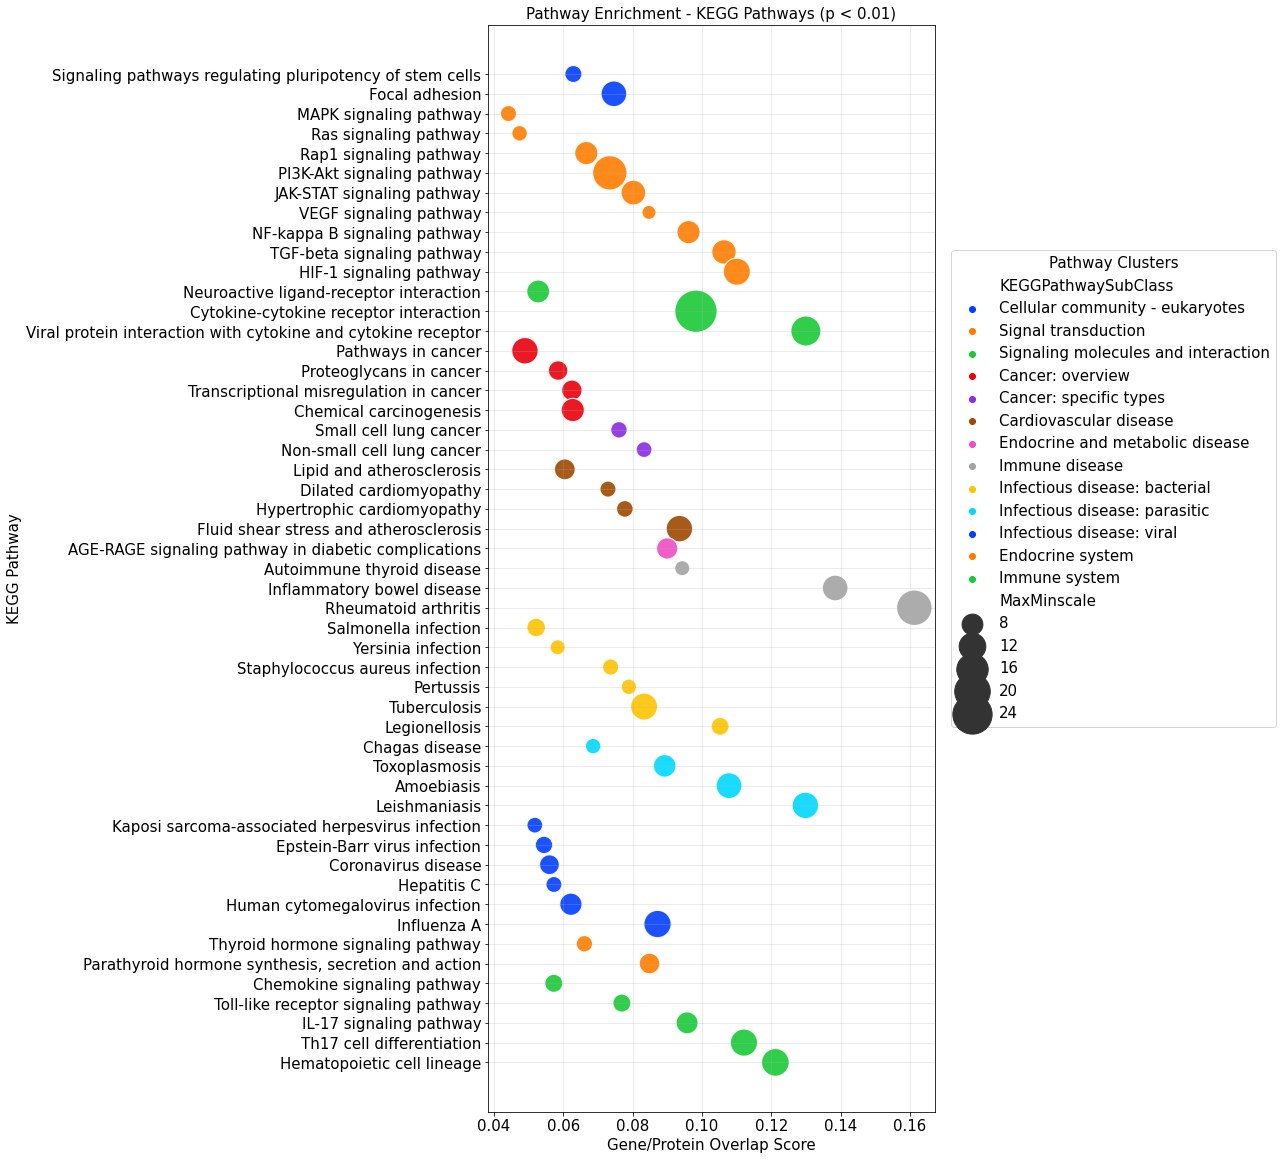

In [18]:
plt.figure(figsize = (8,20))
plt.title('Pathway Enrichment - KEGG Pathways (p < 0.01)')
plt.xlabel('Gene/Protein Overlap Score')
plt.ylabel('KEGG Pathway')
sns.scatterplot(data=keggsort, x="OverlapRatio", y="Term",size = 'MaxMinscale',sizes=(200,1800),hue="KEGGPathwaySubClass", palette="bright",alpha=0.9)
plt.legend(bbox_to_anchor=(1.02,0.8), title = 'Pathway Clusters')
plt.grid(alpha=0.3)
#plt.savefig('KEGG_bubbleplot_subclass.pdf',bbox_inches='tight')
plt.show()

## Jaccard Similarity between pathways based on their gene similarity

The KEGG 2021 Human pathways and their corresponding genes background data was collected from https://maayanlab.cloud/Enrichr/#libraries. 

In [20]:
kegg2021humanbg = pd.read_csv('KEGG_2021_Human_bgdata.tsv',sep='\t',header = None)
print(kegg2021humanbg.shape)
kegg2021humanbg

(320, 3)


,0,1,2
0,ABC transporters,ABCA2;ABCC4;ABCG8;ABCC5;ABCA3;ABCC2;ABCA1;ABCC...,NaN
1,AGE-RAGE signaling pathway in diabetic complic...,TGFB1;TGFB3;TGFB2;VCAM1;AGT;MAPK13;MAPK14;MAPK...,NaN
2,AMPK signaling pathway,RAB2A;PPP2R1A;TSC2;TSC1;PRKAB1;PRKAB2;SCD;LEP;...,NaN
3,Acute myeloid leukemia,DUSP6;JUP;BAD;ZBTB16;RUNX1;BRAF;IL3;PML;PIK3CB...,NaN
4,Adherens junction,PTPN1;RHOA;ACTN4;ACTN1;LMO7;BAIAP2;TGFBR1;TGFB...,NaN
...,...,...,...
315,cAMP signaling pathway,BAD;GRIN2D;GRIN2C;GRIN3A;SST;MAPK10;GRIN3B;ORA...,NaN
316,cGMP-PKG signaling pathway,GUCY1A2;GUCY1A1;BAD;BORCS8-MEF2B;ATP1B4;ATP1B3...,NaN
317,mRNA surveillance pathway,CPSF6;CPSF7;CPSF2;CPSF1;CPSF4;CPSF3;ALYREF;UPF...,NaN
318,mTOR signaling pathway,ATP6V1E1;RPS6;WNT5A;WNT5B;TSC2;TSC1;RRAGB;RRAG...,NaN


In [21]:
# Cleaning the input table
kegg2021humanbg.rename(columns={0: 'Term', 1: 'AllGenes'}, inplace=True)
kegg2021humanbg.drop(2, axis=1, inplace=True)
print(kegg2021humanbg.shape)
kegg2021humanbg

(320, 2)


,Term,AllGenes
0,ABC transporters,ABCA2;ABCC4;ABCG8;ABCC5;ABCA3;ABCC2;ABCA1;ABCC...
1,AGE-RAGE signaling pathway in diabetic complic...,TGFB1;TGFB3;TGFB2;VCAM1;AGT;MAPK13;MAPK14;MAPK...
2,AMPK signaling pathway,RAB2A;PPP2R1A;TSC2;TSC1;PRKAB1;PRKAB2;SCD;LEP;...
3,Acute myeloid leukemia,DUSP6;JUP;BAD;ZBTB16;RUNX1;BRAF;IL3;PML;PIK3CB...
4,Adherens junction,PTPN1;RHOA;ACTN4;ACTN1;LMO7;BAIAP2;TGFBR1;TGFB...
...,...,...
315,cAMP signaling pathway,BAD;GRIN2D;GRIN2C;GRIN3A;SST;MAPK10;GRIN3B;ORA...
316,cGMP-PKG signaling pathway,GUCY1A2;GUCY1A1;BAD;BORCS8-MEF2B;ATP1B4;ATP1B3...
317,mRNA surveillance pathway,CPSF6;CPSF7;CPSF2;CPSF1;CPSF4;CPSF3;ALYREF;UPF...
318,mTOR signaling pathway,ATP6V1E1;RPS6;WNT5A;WNT5B;TSC2;TSC1;RRAGB;RRAG...


In [22]:
# merging this with the keggsort data
keggsort_allgenes = keggsort.merge(kegg2021humanbg,how='left',on='Term')
print(keggsort_allgenes.shape)
keggsort_allgenes

(51, 17)


,Term,Overlap,Pvalue,AdjustedPvalue,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,OverlapEPEK,TotalGenes,OverlapRatio,MaxMinscale,KEGGID,KEGGPathwayMainClass,KEGGPathwaySubClass,AllGenes
0,Signaling pathways regulating pluripotency of ...,9/143,4.381705e-04,2.479647e-03,0,0,4.305554,33.294431,STAT3;LIF;CTNNB1;LIFR;INHBB;INHBA;IL6ST;ACVR2B...,9.0,143.0,0.062937,5.999639,hsa04550,Cellular Processes,Cellular community - eukaryotes,ACVR1;PCGF5;PCGF6;PCGF3;ESX1;WNT5A;WNT5B;LIFR;...
1,Focal adhesion,15/201,7.123446e-07,1.182492e-05,0,0,5.259467,74.446200,FLT1;BAD;ITGB3;FN1;PARVB;EGFR;PGF;VEGFA;PDGFD;...,15.0,201.0,0.074627,11.345301,hsa04510,Cellular Processes,Cellular community - eukaryotes,EGF;ACTN4;BAD;ACTN1;COL1A2;MYL5;COL1A1;MYL7;MA...
2,MAPK signaling pathway,13/294,8.084545e-04,4.026103e-03,0,0,2.982526,21.236734,DUSP3;FLT1;ANGPT2;ANGPT1;IL1R1;BDNF;TNF;EGFR;P...,13.0,294.0,0.044218,5.514956,hsa04010,Environmental Information Processing,Signal transduction,EGF;IL1R1;HSPA1L;CACNA2D2;CACNA2D1;CACNA2D4;CA...
3,Ras signaling pathway,11/232,1.151138e-03,5.211517e-03,0,0,3.197512,21.637577,FLT1;ANGPT2;ANGPT1;BDNF;GNG4;BAD;PDGFD;KDR;EGF...,11.0,232.0,0.047414,5.256884,hsa04014,Environmental Information Processing,Signal transduction,EGF;BAD;MAPK10;TEK;EPHA2;CALM2;CALM3;CALM1;RIN...
4,Rap1 signaling pathway,14/210,6.267038e-06,7.093148e-05,0,0,4.640476,55.593864,FYB1;FLT1;ANGPT2;ANGPT1;ITGB3;EGFR;PGF;VEGFA;C...,14.0,210.0,0.066667,9.553796,hsa04015,Environmental Information Processing,Signal transduction,EGF;MAPK13;MAPK14;MAPK11;MAPK12;TEK;EPHA2;PFN2...
5,PI3K-Akt signaling pathway,26/354,7.898348e-11,6.555629e-09,0,0,5.328040,123.939714,FLT1;CSH2;CSH1;ITGB3;PRL;EGFR;RXRA;GNG4;PDGFD;...,26.0,354.0,0.073446,18.842942,hsa04151,Environmental Information Processing,Signal transduction,EGF;BAD;PPP2R1A;EREG;COL1A2;COL1A1;LPAR6;C8ORF...
6,JAK-STAT signaling pathway,13/162,1.756643e-06,2.430023e-05,0,0,5.663025,75.047004,CSH2;CSH1;FHL1;STAT3;LIF;LIFR;PRL;EGFR;IL6;BCL...,13.0,162.0,0.080247,10.625025,hsa04630,Environmental Information Processing,Signal transduction,PDGFRB;PTPN2;IL4R;EGF;PDGFRA;PRLR;OSM;LIFR;IL2...
7,VEGF signaling pathway,5/59,2.313024e-03,9.761747e-03,0,0,5.882776,35.703740,BAD;SPHK1;KDR;PTGS2;VEGFA,5.0,59.0,0.084746,4.629284,hsa04370,Environmental Information Processing,Signal transduction,BAD;SPHK2;SPHK1;NFATC2;MAPK13;VEGFA;MAPK14;MAP...
8,NF-kappa B signaling pathway,10/104,5.591142e-06,6.960971e-05,0,0,6.856103,82.919952,CXCL12;CXCL8;IL1R1;IL1B;BCL2;IGH;PTGS2;TNF;TLR...,10.0,104.0,0.096154,9.572606,hsa04064,Environmental Information Processing,Signal transduction,UBE2I;IL1R1;IGH;VCAM1;TICAM2;TICAM1;EDAR;CXCL1...
9,TGF-beta signaling pathway,10/94,2.223726e-06,2.914252e-05,0,0,7.676222,99.916207,FST;NOG;INHBB;INHBA;FMOD;TNF;LTBP1;ACVR2B;ACVR...,10.0,94.0,0.106383,10.443312,hsa04350,Environmental Information Processing,Signal transduction,TGFB1;ACVR1;RHOA;TGFB3;TGFB2;SMURF2;SMURF1;BMP...


The jaccard similarity between two pathways has been calculated as:
$$
Jaccard_{P_i,P_j} = \frac{P_{i,Genes} \bigcap P_{j,Genes}}{P_{i,Genes} \bigcup P_{j,Genes}}
$$
where,
$$
\begin{aligned}
P_i &\rightarrow & \text{Pathway i} \\
P_{i,Genes} &\rightarrow & \text{Genes in pathway i}
\end{aligned}
$$

In [23]:
# Function to calculate the jaccard similarity.
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

In [27]:
# Calculating the different pairs and their corresponding similarities from the given table.
connections = [['Term1','Term1Pvalue','Term2Pvalue','Term2','Jaccard_Index']]
oppconnections = []
for i in range(keggsort_allgenes.shape[0]):
    node1 = keggsort_allgenes['Term'][i]
    genelist1 = keggsort_allgenes['AllGenes'][i].split(';')[:-1]
    pv1 = keggsort_allgenes['AdjustedPvalue'][i]
    for j in range(keggsort_allgenes.shape[0]):
        if j!=i: # Excluding self-similarities
            node2 = keggsort_allgenes['Term'][j]
            genelist2 = keggsort_allgenes['AllGenes'][j].split(';')[:-1]
            pv2 = keggsort_allgenes['AdjustedPvalue'][j]
            jaccardindex = jaccard_similarity(genelist1,genelist2)
            edge = [node1,pv1,pv2,node2,jaccardindex]
            oppedge = [node2,pv2,pv1,node1,jaccardindex]
            if oppedge in oppconnections or edge in oppconnections: continue
            else:
                connections.append(edge)
                oppconnections.append(oppedge)
connectionsdf = pd.DataFrame(connections[1:],columns = connections[0])
print(connectionsdf.shape)
connectionsdf

(1275, 5)


,Term1,Term1Pvalue,Term2Pvalue,Term2,Jaccard_Index
0,Signaling pathways regulating pluripotency of ...,0.002480,1.182492e-05,Focal adhesion,0.058462
1,Signaling pathways regulating pluripotency of ...,0.002480,4.026103e-03,MAPK signaling pathway,0.060680
2,Signaling pathways regulating pluripotency of ...,0.002480,5.211517e-03,Ras signaling pathway,0.071429
3,Signaling pathways regulating pluripotency of ...,0.002480,7.093148e-05,Rap1 signaling pathway,0.092879
4,Signaling pathways regulating pluripotency of ...,0.002480,6.555629e-09,PI3K-Akt signaling pathway,0.064240
...,...,...,...,...,...
1270,Toll-like receptor signaling pathway,0.001511,3.705239e-06,Th17 cell differentiation,0.104712
1271,Toll-like receptor signaling pathway,0.001511,2.472478e-06,Hematopoietic cell lineage,0.020101
1272,IL-17 signaling pathway,0.000152,3.705239e-06,Th17 cell differentiation,0.148571
1273,IL-17 signaling pathway,0.000152,2.472478e-06,Hematopoietic cell lineage,0.037634


In [28]:
# Max and min values of jaccard similarities.
print('Max Jaccard similarity = ',connectionsdf['Jaccard_Index'].max())
print('Min Jaccard similarity = ',connectionsdf['Jaccard_Index'].min())

Max Jaccard similarity =  0.7547169811320755
Min Jaccard similarity =  0.0


Considered a Jaccard similarity minimum cut-off of 0.1:

In [29]:
connections0_1 = connectionsdf[connectionsdf.Jaccard_Index > 0.1]
print(connections0_1.shape)
connections0_1

(360, 5)


,Term1,Term1Pvalue,Term2Pvalue,Term2,Jaccard_Index
6,Signaling pathways regulating pluripotency of ...,0.002480,0.009762,VEGF signaling pathway,0.116022
8,Signaling pathways regulating pluripotency of ...,0.002480,0.000029,TGF-beta signaling pathway,0.139423
13,Signaling pathways regulating pluripotency of ...,0.002480,0.000007,Pathways in cancer,0.123333
14,Signaling pathways regulating pluripotency of ...,0.002480,0.000702,Proteoglycans in cancer,0.212544
18,Signaling pathways regulating pluripotency of ...,0.002480,0.004477,Non-small cell lung cancer,0.102564
...,...,...,...,...,...
1265,Chemokine signaling pathway,0.001511,0.001511,Toll-like receptor signaling pathway,0.116981
1269,Toll-like receptor signaling pathway,0.001511,0.000152,IL-17 signaling pathway,0.178571
1270,Toll-like receptor signaling pathway,0.001511,0.000004,Th17 cell differentiation,0.104712
1272,IL-17 signaling pathway,0.000152,0.000004,Th17 cell differentiation,0.148571


Saving the connections as edge data and information table as node data for cytoscape netowrk plotting.

In [30]:
#connections0_1.to_csv('EDGE_KEGG_pathway_network.tsv',index=False, sep = '\t')

In [31]:
#keggsort.to_csv('NODE_KEGG_pathway_netowrk.tsv',index=False, sep = '\t')